In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
N = 100

X1 = np.array([np.random.normal(13, 2, N), np.random.normal(13, 2, N)]).T
X2 = np.array([np.random.normal(6, 2, N), np.random.normal(6, 2, N)]).T

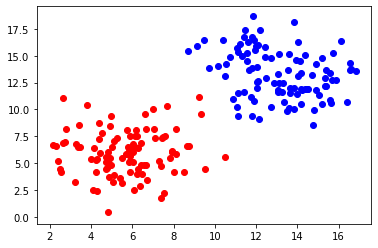

In [118]:
plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')

## Áp dụng Stochastic Gradient Descent

In [119]:
def sgn_activation(X, w):
    """
    Dự đoán label cho từng hàng trong tập X, với vector trọng số w biết trước
    X: một mảng 2-d, shape (N, d), với mỗi hàng là một điểm dữ liệu
    w: một mảng 1-d, shape (d)"""
    return np.sign(X.dot(w))

In [120]:
def perceptron_SGD(X, y, w_init):
    """Biểu diễn PLA
    y: một mảng 1-d (N), label của từng hàng trong tập X, có y[i] = 1|(-1)
    """
    w = w_init
    for i in range(1, 10000):
        y_prediction = sgn_activation(X, w)
        # Tìm các điểm bị phân loại lỗi
        mis_idxs = np.where(np.equal(y_prediction, y) == False)[0]
        # Tổng các điểm bị phân loại lỗi
        num_mis = mis_idxs.shape[0]
        if num_mis == 0: # Không còn điểm bị phân loại lỗi
            break
        random_id = np.random.choice(mis_idxs, 1)[0]
        # Cập nhật w
        w = w + y[random_id] * X[random_id]
    return w, i

In [121]:
X = np.concatenate((X1, X2), axis = 0) 
y = np.concatenate((np.ones(N), -1*np.ones(N)))

Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])

w, i = perceptron_SGD(Xbar, y, w_init)

Text(0.5, 1.0, 'Line parameter: -108.801249_6.791590_3.879892, with iterations: 309')

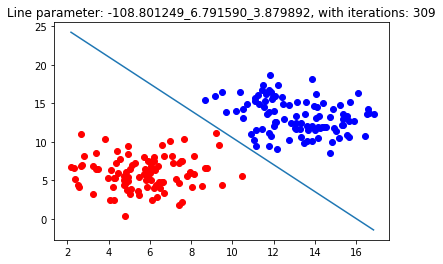

In [122]:
x1 = np.array([X[:, 0].min(), X[:, 0].max()])
# w0 + w1*x1 + w2*x2 = 0 
x2 = -(w[0] + w[1]*x1)/w[2]

plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.plot(x1, x2)

plt.title("Line parameter: %f_%f_%f, with iterations: %d" %(w[0], w[1], w[2], i))

In [123]:
def perceptron_batch_GD(X, y, w_init):
    """Biểu diễn PLA
    y: một mảng 1-d (N), label của từng hàng trong tập X, có y[i] = 1|(-1)
    """
    w = w_init
    for i in range(1, 10):
        pred = predict(X, w)
        # Tìm các điểm bị phân loại lỗi
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # Tổng các điểm bị phân loại lỗi
        num_mis = mis_idxs.shape[0]
        if num_mis == 0: # Không còn điểm bị phân loại lỗi
            return w, i
        # Cập nhật w
        for j in mis_idxs:
            w = w + y[j] * X[j]
    return w, i

In [128]:
w, i = perceptron_batch_GD(Xbar, y, w_init)

Text(0.5, 1.0, 'Line parameter: -3239.801249_260.447082_65.048011, with iterations: 104')

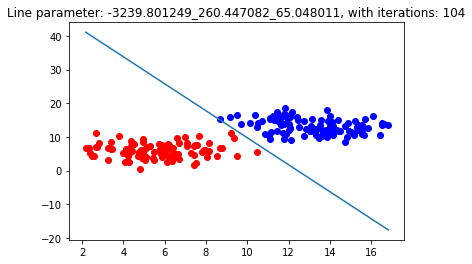

In [129]:
x1 = np.array([X[:, 0].min(), X[:, 0].max()])
# w0 + w1*x1 + w2*x2 = 0 
x2 = -(w[0] + w[1]*x1)/w[2]

plt.scatter(X1[:, 0], X1[:, 1], color='blue')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
plt.plot(x1, x2)

plt.title("Line parameter: %f_%f_%f, with iterations: %d" %(w[0], w[1], w[2], i))